In [1]:
import acgan
import acgan.model.bigmmgan
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds
def load_splits(name, batch_size=128, split=None, **kargs):
    def load_split(split):
        dataset = acgan.data.load(
            name, batch_size, split=split, 
            with_label=True,
            **kargs)
        dataset = acgan.data.to_one_hot(dataset, 10)
        return tf.compat.v1.data.make_one_shot_iterator(
            dataset).get_next()
    if split is None:
        return SimpleNamespace(
            train=load_split(tfds.Split.TRAIN),
            valid=load_split(tfds.Split.TEST))
    else:
        return load_split(split)
    
train_data = load_splits('cifar10', split=tfds.Split.TRAIN,
                         augment_data=True,
                         crop_method='pad'
                         )

loading split train
using augmented dataset


In [ ]:
model = acgan.model.bigmmgan.BiGmmGan(
    embedding_size=64,
    batchnorm='pixelwise',
    equalized=True,
    generator={
        'init_shape': [4, 4, 32],
        'units': [256, 128, 64],
        'output_channels': 3,
        'output_activation': None,
        'add_noise': True},
    discriminator={
        'units': [64, 128, 256]
    },
    embedding={
        'n_components': 25
    },
    encoder={
        'units': [32, 64, 128, 256],
        'strides': None,
        'pooling': 2
    }
)

In [4]:
import twodlearn as tdl
import twodlearn.debug

@tdl.debug.stop_at_error
def _test():
    gen_train = model.generator_trainer(batch_size=16, learning_rate=0.0002, beta1=0.0)
    dec_train = model.discriminator_trainer(train_data['image'], batch_size=16, learning_rate=0.0002, beta1=0.0)
    enc_train = model.encoder_trainer(train_data, batch_size=16)
_test()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
model.generator.hidden_shapes()

[TensorShape([Dimension(None), Dimension(4), Dimension(4), Dimension(32)]),
 TensorShape([Dimension(None), Dimension(8), Dimension(8), Dimension(256)]),
 TensorShape([Dimension(None), Dimension(16), Dimension(16), Dimension(128)]),
 TensorShape([Dimension(None), Dimension(32), Dimension(32), Dimension(64)])]

In [6]:
model.encoder.internal_shapes()

[TensorShape([Dimension(16), Dimension(32), Dimension(32), Dimension(16)]),
 TensorShape([Dimension(16), Dimension(2), Dimension(2), Dimension(256)]),
 TensorShape([Dimension(16), Dimension(256)]),
 TensorShape([Dimension(16), Dimension(64)])]

In [ ]:
#model.encoder.hidden.layers[0].layers[0].downsample
#model.discriminator.hidden[4].layers[0].downsample

In [ ]:
## TRAIN

In [3]:
import acgan
import acgan.model.bigmmgan
import tensorflow as tf
from types import SimpleNamespace
from acgan.main import (
    ExperimentGMM, ExperimentWACGAN, ExperimentWACGAN_V2, ExperimentWACGAN_Dev,
    ExperimentBiGmmGan)

FLAGS = None
EXPERIMENTS = {
    'gmmgan': ExperimentGMM,
    'wacgan': ExperimentWACGAN,
    'wacganV2': ExperimentWACGAN_V2,
    'wacganDev': ExperimentWACGAN_Dev,
    'bigmmgan': ExperimentBiGmmGan}

FLAGS = SimpleNamespace(
    model='bigmmgan',
    dataset='cifar10',
    indicator='cifar10_nb',
    n_steps_save=10)

In [4]:
#

In [5]:
experiment = EXPERIMENTS[FLAGS.model](
    dataset_name=FLAGS.dataset,
    indicator=FLAGS.indicator)

loading split train



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
import twodlearn as tdl
#experiment.trainer.gen.variables
tdl.core.get_trainable(experiment.model.generator)
#experiment.model.generator.hidden

[<tf.Variable 'BiGmmGan/generator/Generator/input_layer/Conv2DLayer/kernel/kernel:0' shape=(3, 3, 512, 512) dtype=float32>,
 <tf.Variable 'BiGmmGan/generator/Generator/hidden/ResBottleneck/layers/ResBlockPreAct_1/residual/Conv2DBlock/conv/Conv2DLayer_2/bias/bias:0' shape=(256,) dtype=float32>,
 <tf.Variable 'BiGmmGan/generator/Generator/hidden/ResBottleneck_1/layers/ResBlockPreAct/residual/Conv2DBlock/conv/Conv2DLayer/kernel/kernel:0' shape=(1, 1, 256, 32) dtype=float32>,
 <tf.Variable 'BiGmmGan/generator/Generator/hidden/ResBottleneck_2/layers/ResBlockPreAct_2/residual/Conv2DBlock/conv/Conv2DLayer_1/bias/bias:0' shape=(16,) dtype=float32>,
 <tf.Variable 'BiGmmGan/generator/Generator/hidden/ResBottleneck_1/layers/ResBlockPreAct/residual/Conv2DBlock/conv/Conv2DLayer_1/bias/bias:0' shape=(32,) dtype=float32>,
 <tf.Variable 'BiGmmGan/generator/Generator/hidden/ResBottleneck/layers/ResBlockPreAct_1/residual/Conv2DBlock/conv/Conv2DLayer_1/bias/bias:0' shape=(64,) dtype=float32>,
 <tf.Variab

In [10]:
experiment.model.generator.hidden.layers

In [11]:
import twodlearn as tdl

#tdl.core.variables_initializer(experiment.)

cifar10_nb | step(d/g) 179/222 | dis 0.5779 | gen 1.1251 : : 403it [01:28,  4.55it/s]                       
  0%|          | 0/10 [00:00<?, ?it/s]

initializing



  5%|▌         | 10/199 [00:03<01:00,  3.10it/s]
step 10 | loss 122.4975:   5%|▌         | 10/199 [00:03<01:00,  3.10it/s]
step 10 | loss 122.4975:  10%|█         | 20/199 [00:03<00:43,  4.15it/s]
step 20 | loss 116.8240:  10%|█         | 20/199 [00:03<00:43,  4.15it/s]
step 20 | loss 116.8240:  15%|█▌        | 30/199 [00:04<00:31,  5.42it/s]
step 30 | loss 114.0891:  15%|█▌        | 30/199 [00:04<00:31,  5.42it/s]
step 30 | loss 114.0891:  20%|██        | 40/199 [00:04<00:23,  6.87it/s]
step 40 | loss 112.2243:  20%|██        | 40/199 [00:04<00:23,  6.87it/s]
checkpoint added:  25%|██▌       | 50/199 [00:06<00:23,  6.22it/s]
step 50 | loss 111.1882:  25%|██▌       | 50/199 [00:06<00:23,  6.22it/s]
step 50 | loss 111.1882:  30%|███       | 60/199 [00:07<00:17,  7.83it/s]
step 60 | loss 110.2905:  30%|███       | 60/199 [00:07<00:17,  7.83it/s]
step 60 | loss 110.2905:  35%|███▌      | 70/199 [00:07<00:13,  9.55it/s]
step 70 | loss 109.6425:  35%|███▌      | 70/199 [00:07<00:13,  9.55i

--> Resetting embedding.
initializing



checkpoint added:   4%|▍         | 10/249 [00:08<03:12,  1.24it/s]
step 10 | loss 117.5855:   4%|▍         | 10/249 [00:08<03:12,  1.24it/s]
step 10 | loss 117.5855:   8%|▊         | 20/249 [00:09<02:18,  1.66it/s]
step 20 | loss 116.7638:   8%|▊         | 20/249 [00:09<02:18,  1.66it/s]
step 20 | loss 116.7638:  12%|█▏        | 30/249 [00:10<01:41,  2.15it/s]
step 30 | loss 116.6208:  12%|█▏        | 30/249 [00:10<01:41,  2.15it/s]
step 30 | loss 116.6208:  16%|█▌        | 40/249 [00:12<01:16,  2.73it/s]
step 40 | loss 116.5284:  16%|█▌        | 40/249 [00:12<01:16,  2.73it/s]
checkpoint added:  20%|██        | 50/249 [00:13<00:59,  3.33it/s]
step 50 | loss 116.3260:  20%|██        | 50/249 [00:13<00:59,  3.33it/s]
step 50 | loss 116.3260:  24%|██▍       | 60/249 [00:15<00:47,  3.96it/s]
step 60 | loss 116.1371:  24%|██▍       | 60/249 [00:15<00:47,  3.96it/s]
step 60 | loss 116.1371:  28%|██▊       | 70/249 [00:16<00:39,  4.55it/s]
step 70 | loss 115.9221:  28%|██▊       | 70/249 [0

--> Resetting embedding.



  4%|▍         | 10/249 [00:00<00:17, 13.70it/s]
step 450 | loss 105.1541:   4%|▍         | 10/249 [00:00<00:17, 13.70it/s]
step 450 | loss 105.1541:   8%|▊         | 20/249 [00:02<00:21, 10.77it/s]
step 460 | loss 105.3122:   8%|▊         | 20/249 [00:02<00:21, 10.77it/s]
step 460 | loss 105.3122:  12%|█▏        | 30/249 [00:03<00:23,  9.31it/s]
step 470 | loss 105.3218:  12%|█▏        | 30/249 [00:03<00:23,  9.31it/s]
step 470 | loss 105.3218:  16%|█▌        | 40/249 [00:04<00:24,  8.53it/s]
step 480 | loss 105.3695:  16%|█▌        | 40/249 [00:04<00:24,  8.53it/s]
step 480 | loss 105.3695:  20%|██        | 50/249 [00:06<00:24,  8.07it/s]
step 490 | loss 105.3473:  20%|██        | 50/249 [00:06<00:24,  8.07it/s]
step 490 | loss 105.3473:  24%|██▍       | 60/249 [00:07<00:24,  7.82it/s]
step 500 | loss 105.3834:  24%|██▍       | 60/249 [00:07<00:24,  7.82it/s]
step 500 | loss 105.3834:  28%|██▊       | 70/249 [00:09<00:23,  7.62it/s]
step 510 | loss 105.3869:  28%|██▊       | 70/249 

Instructions for updating:
The `probs` property will return `None` when the distribution is parameterized with `probs=None`. Use `probs_parameter()` instead.


Instructions for updating:
The `probs` property will return `None` when the distribution is parameterized with `probs=None`. Use `probs_parameter()` instead.


AttributeError: 'list' object has no attribute 'eval'

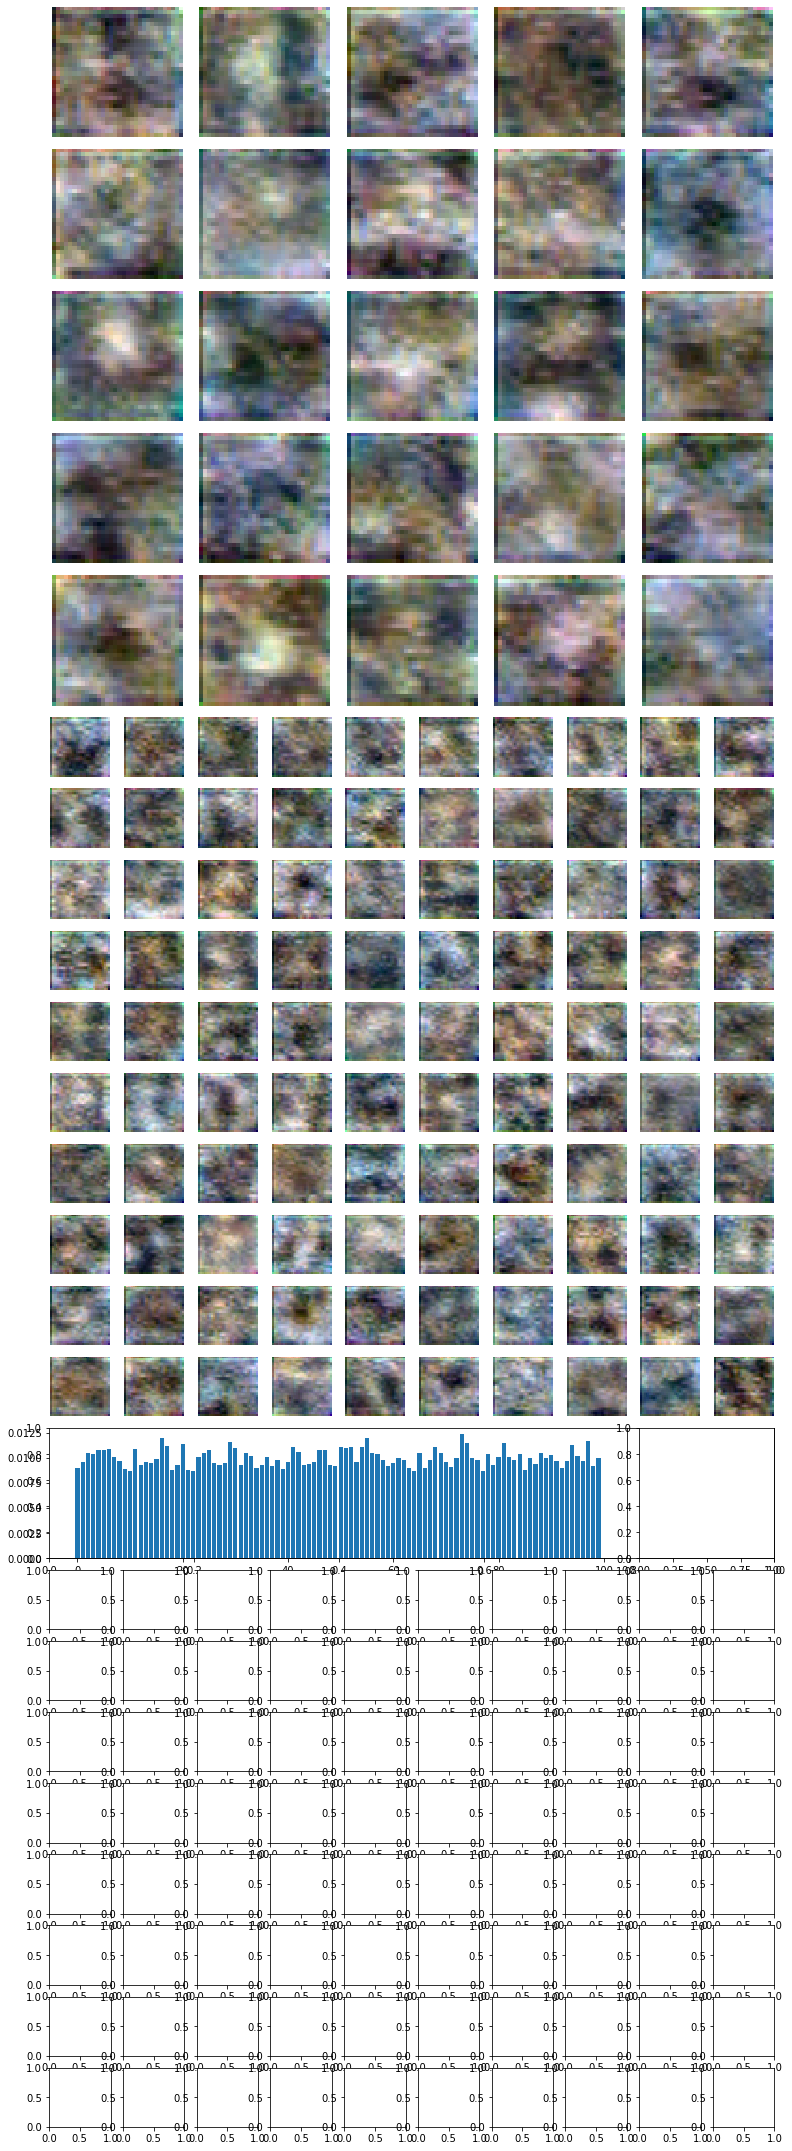

In [12]:
while not experiment.run(n_steps=int(FLAGS.n_steps_save)):
    print('------------------- RESTORING ---------------------')
    experiment.restore()
experiment.save()
experiment.visualize(save=True)

In [15]:
experiment.trainer.dis.xreal

[<tf.Tensor 'StopGradient:0' shape=(?, 8, 8, 3) dtype=float32>,
 <tf.Tensor 'StopGradient_1:0' shape=(?, 16, 16, 3) dtype=float32>,
 <tf.Tensor 'StopGradient_2:0' shape=(?, 32, 32, 3) dtype=float32>]